* [sympy.plottingでaspect_ratioが変えられない？　件について](https://qiita.com/HigashinoSola/items/6f4cc47d42a7a5bdcc47)
* [SymPyを使ってみる](http://taromaru-kun.hatenablog.com/entry/2015/03/14/214822)
* [PythonのSymPyで変分ベイズの例題を理解する](http://statmodeling.hatenablog.com/entry/variational-bayesian-inference-with-sympy)
* [SymPyの使い方をランダムに表示](https://www.sympygamma.com/)
* [SymPy Live](https://live.sympy.org/)
* [Sympyで方程式を解いてみる](http://e-yuki67.hatenablog.com/entry/2017/03/26/212722)


In [1]:
%matplotlib inline
from sympy import *
from sympy.plotting import plot
from sympy.stats import *
from sympy.solvers.ode import *
 from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>> k, m, n = symbols('k m n', integer=True)

from sympy import Matrix
from IPython.display import display
f, g, h = symbols('f g h', cls=Function)
# init_printing(use_unicode=True)
# init_printing(use_unicode=False, wrap_line=True)
# init_session()

MultipleInstanceError: Multiple incompatible subclass instances of TerminalInteractiveShell are being created.

## 変数(代数的シンボル)の定義

In [8]:
x, y = symbols("x y")
x + y -y

## 関数の定義

In [21]:
f = 2 * x ** 2 - 3 * x + 1
f

## 関数に値を適用

In [22]:
f.subs([(x, 0)])

## xが[-1, 2]の範囲を図示する

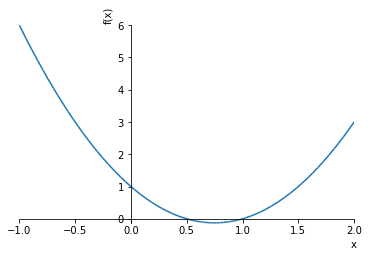

In [28]:
plot(f, (x, -1, 2))

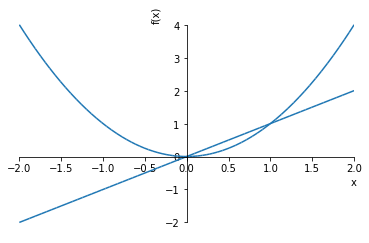

In [30]:
## ２つの関数を同時に表示
plot(x**2, x, (x, -2, 2))

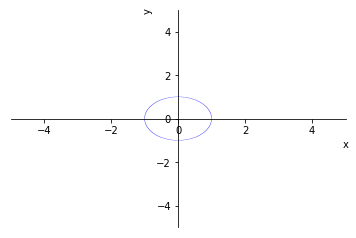

In [31]:
## 陰関数
plot_implicit(x**2+y**2-1)

## 因数分解

In [18]:
f.factor()

## 方程式

In [19]:
Eq(f, 0)

## $f(x) = 0$ となる方程式の解を見つける

In [20]:
solve(Eq(f, 0), x)

## 関数を $x$ で微分

In [15]:
grad = diff(f, x)
grad

## 不定積分

In [24]:
integrate(f, x)

## 定積分

In [25]:
integrate(f, (x, 0, 1))

In [27]:
a, b = symbols("a b")
integrate(f, (x, a, b))

## 極限

In [32]:
limit(sin(x)/x, x, 0)

## テイラー展開

In [34]:
sin(x).series(x)

## 方程式を解く

In [36]:

# デフォルトだと微分方程式を解いたときに誤差関数(error function)を使うのでそれを書き直す関数
def expand_erfs(expr):
    """ 誤差関数を開く """
    return expr.replace(erf, lambda x: 2/sqrt(pi) * Integral(exp(-t**2), (t, 0, x)))\
               .replace(erfi, lambda x: 2/sqrt(pi) * Integral(exp(t**2), (t, 0, x))).simplify()

# 積分定数を潰す関数constantsimp()は積分定数を引数として
# 渡さなければいけないので、C1,C2,...をシンボルとして定義しなければいけない。
# それだとめんどくさいので、積分定数でないシンボルを渡せばすむ関数があると便利。
def constsimp(expr, variable):
    """ variable以外の自由変数をconstantsimp()に渡す """
    return constantsimp(expr, [c for c in ans.free_symbols if c != variable])

x = symbols("x")
a, b, c, t = symbols("a b c t")
y, f, g, P, Q, R = symbols('y f g P Q R', cls=Function)

In [37]:
expr = Eq(x**2+3*x-4)
display(expr, solveset(expr, x)) # solve()という関数もあるがsolveset()が推奨されている

In [38]:
expr = x**3+3*x**2+3*x-4
display(Eq(expr), solveset(expr))

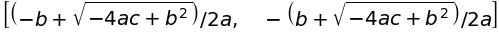

In [39]:
a, b, c = symbols("a b c")
solve(a*x**2+b*x+c, x)

In [40]:
solveset(Gt(x**2, 0), domain=S.Reals)

In [41]:
solveset(sin(x) - sqrt(3)/2, domain=S.Reals)

## 微分方程式

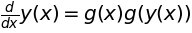

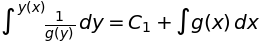

In [44]:
# 変数分離系
eq = Eq(Derivative(y(x)), g(x)*g(y(x)))
display(eq, dsolve(eq, y(x)))

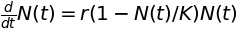

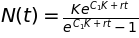

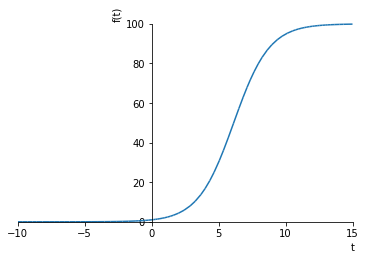

In [45]:
# ロジスティック写像
# シンボルを定義
t, r, K = symbols("t r K")
N = symbols("N", cls=Function)
# ロジスティック方程式を定義
eq = Eq(Derivative(N(t)), r*(1-(N(t)/K))*N(t))
display(eq)
# 一般解を求める
ans = dsolve(eq)
display(ans)

# 特殊化する
args = [(K, 100), (r, 0.75)]
init_val = 1.0
func = ans.rhs.subs(args)
# 初期値を方程式の解として求める
c = solve(Eq(func.subs([(t, 0)]), init_val), domain=S.Reals)
# プロットする
C1 = symbols("C1") # 積分定数用のシンボルを定義しなきゃいけないのがめんどくさい
plot(func.subs([(C1, c[0])]), (t, -10, 15))

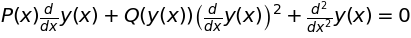

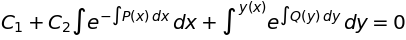

In [46]:
# LiouVille(リウビル)型
LiouVille = Eq(y(x).diff(x,2) + P(x)*y(x).diff(x) + Q(y(x))*y(x).diff(x)**2)
display(LiouVille, dsolve(LiouVille, y(x), hint="Liouville"))

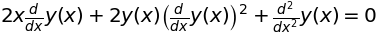

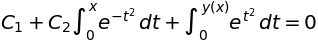

In [47]:
eq = Eq(y(x).diff(x,2) + 2*x*y(x).diff(x) + 2*y(x)*y(x).diff(x) ** 2)
ans = dsolve(eq, hint="Liouville")
display(eq, ans, constsimp(expand_erfs(ans), x))

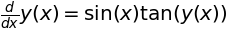

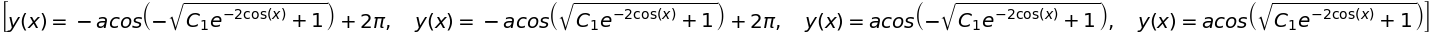

In [48]:
eq = Eq(y(x).diff(x), sin(x)*tan(y(x)))
display(eq, dsolve(eq, y(x)))

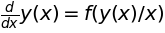

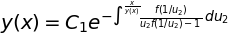

In [49]:
# 同次型
eq = Eq(y(x).diff(x), f(y(x)/x))
display(eq, dsolve(eq, y(x)))

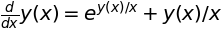

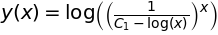

In [50]:
eq = Eq(y(x).diff(x) , exp(y(x)/x) + y(x)/x)
display(eq, dsolve(eq))

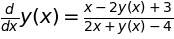

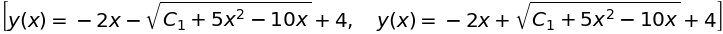

In [51]:
# 分離型

eq = Eq(y(x).diff(x), (x-2*y(x)+3)/(2*x+y(x)-4))
display(eq, dsolve(eq))

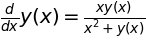

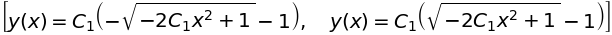

In [52]:
eq = Eq(y(x).diff(x), x*y(x)/(x**2+y(x)))
display(eq, dsolve(eq, hint="lie_group"))

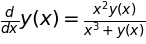

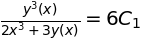

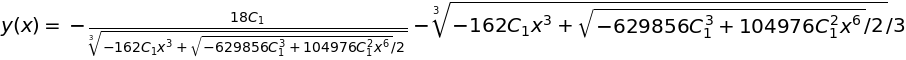

In [53]:
# 自動で解けないのもあるので、そのときは答を代入する
eq = Eq(y(x).diff(x), x**2*y(x)/(x**3+y(x)))
# この答えは手で解いたもの
ans_implicit = Eq(y(x)**3/(2*x**3+3*y(x)), 6*C1)
# 実数解だけ取る(虚数解でも成り立つだろうけどとりあえず無視)
ans = solve(ans_implicit, y(x))[0]
# これがTrueなのでans_implicitが正しいと分かる
display(eq, ans_implicit, Eq(y(x), ans), eq.subs([(y(x), ans)]).doit().simplify())

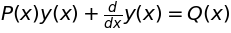

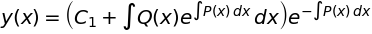

In [54]:
## 定数変化法
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq, dsolve(eq, y(x), hint="almost_linear"))

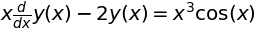

In [55]:
eq = Eq(x*y(x).diff(x) - 2*y(x), x**3*cos(x))
display(eq, dsolve(eq, y(x)))

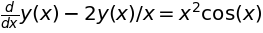

In [56]:
# 一般解から解いてみる
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq.subs([(P(x), -2/x), (Q(x), x**2*cos(x))]),
        dsolve(eq, hint="almost_linear").subs([(P(x), -2/x), (Q(x), x**2*cos(x))]).doit())

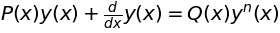

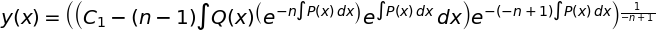

In [57]:
## Bernoulli(ベルヌーイ)型
n = symbols("n")
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x)*y(x)**n)
display(eq, dsolve(eq, hint="Bernoulli"))

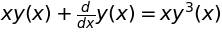

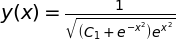

In [58]:
eq = Eq(y(x).diff(x)+x*y(x), x*y(x)**3)
display(eq, dsolve(eq, hint="Bernoulli"))

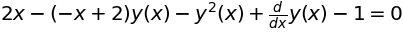

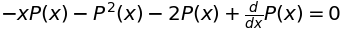

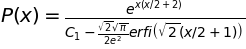

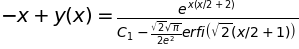

In [59]:
# Riccati(リッカチ)型
# 自動で解くのは無理っぽい
eq = Eq(y(x).diff(x) - y(x)**2 - (2-x)*y(x) + 2*x - 1)
spec_ans = x
display(eq.subs([(y(x), spec_ans)]).doit().simplify())
bern = eq.subs([(y(x), P(x)+spec_ans)]).doit().simplify()
ans = dsolve(bern, hint="Bernoulli")
display(eq, bern, ans, ans.subs([(P(x), y(x)-x)]))

In [60]:
# Clairaur(クレロー)型
eq = Eq(y(x), x*y(x).diff(x) - y(x).diff(x)**2)
dsolve(eq)

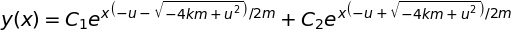

In [61]:
## 減衰振動
m, k, u = symbols("m k u")
eq = Eq(m*y(x).diff(x,2), -k*y(x) - u * y(x).diff(x))
dsolve(eq)

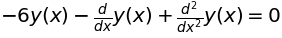

In [63]:
# 定数係数斉次線形
# 一番簡単なやつ
eq = Eq(y(x).diff(x,2) - y(x).diff(x) - 6*y(x))
display(eq, dsolve(eq))

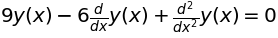

In [64]:

# 重解のパターン
eq = Eq(y(x).diff(x, 2) - 6*y(x).diff(x) + 9*y(x))
display(eq, dsolve(eq))

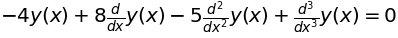

In [65]:
eq = Eq(y(x).diff(x,3) - 5*y(x).diff(x,2) + 8*y(x).diff(x) - 4*y(x))
display(eq, dsolve(eq))


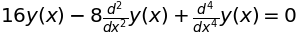

In [66]:
eq = Eq(y(x).diff(x,4) - 8*y(x).diff(x,2) + 16*y(x))
display(eq, dsolve(eq))

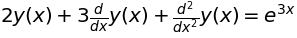

In [67]:

eq = Eq(y(x).diff(x, 2) + 3*y(x).diff(x) + 2*y(x), exp(3*x))
display(eq, dsolve(eq))


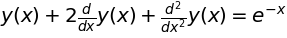

In [68]:
eq = Eq(y(x).diff(x, 2) + 2*y(x).diff(x) + y(x), exp(-x))
display(eq, dsolve(eq))

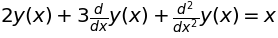

In [69]:
eq = Eq(y(x).diff(x, 2) + 3*y(x).diff(x) + 2*y(x), x)
display(eq, dsolve(eq))

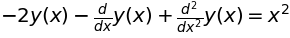

In [70]:
eq = Eq(y(x).diff(x, 2) - y(x).diff(x) - 2*y(x), x**2)
display(eq, dsolve(eq))

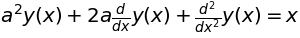

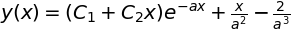

In [71]:
eq = Eq(y(x).diff(x, 2) + 2*a*y(x).diff(x) + a**2*y(x), x)
display(eq, dsolve(eq))

## 微分方程式

In [82]:
f, g = symbols('f g', cls=Function)

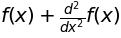

In [83]:
f(x).diff(x, x) + f(x)

In [84]:
dsolve(f(x).diff(x, x) + f(x), f(x))

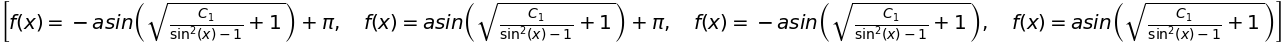

In [86]:
dsolve(sin(x)*cos(f(x)) + cos(x)*sin(f(x))*f(x).diff(x), f(x), hint='separable') 

In [95]:
z = Symbol("z")
F1 = x * x + 2 * x + 1 # 普通にシンボルを演算するだけ
F2 = x ** 5 + x + 1 # 高次式
F3 = (x + 2) * (x - 1) / ((x - 2) * (x - 2)) # 有理関数
F4 = cos(pi * x) # 三角関数
F5 = exp(x) / sym.Pow(x, 10) # 指数関数とべき乗
F6 = log(x * x + 1) # 対数関数
F7 = (x + y) ** 3 # 2変数関数
F8 = (x + y + z / 2) ** 4 # 多変数関数

expand(F8)

TypeError: 'property' object is not iterable